# Working with data 2017. Class 1 
## Contact
Javier Garcia-Bernardo
garcia@uva.nl


## 0. Structure
1. About Python
2. Data types, structures and code
3. Read csv files to dataframes
4. Basic operations with dataframes
5. My first plots
6. Debugging python
7. Summary 


In [1]:
##Some code to run at the beginning of the file, to be able to show images in the notebook
##Don't worry about this cell

#Print the plots in this screen
%matplotlib inline 

#Be able to plot images saved in the hard drive
from IPython.display import Image 

#Make the notebook wider
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:90% !important; }</style>"))

import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt

---

# 5. One way to make a scatter plot
Finally!
- We will use the libraries matplotlib and seaborn.
- seaborn makes beautiful plots. matplotlib is easier (and it's the base of seaborn).


In [25]:
#this tells the computer to plot everything here
%matplotlib inline 

#importing this library makes the default colors be beautiful
import seaborn as sns 

#this import matplotlib
import pylab as plt

In [26]:
#First we reed our data
import pandas as pd
df = pd.read_csv("../1_Python/data/class1_test_csv.csv",sep="\t",skiprows=4,na_values=["-9"])
df["happiness"] = [1,2,3,4,5,6,7,8,9,10,11,12]
df["events"] = [1,2,3,4,5,6,7,8,9,10,11,12]
df = df.dropna()
df.head()

,person,year,treatment,score,happiness,events
0,1,2000,1,4.0,1,1
1,2,2000,1,3.0,2,2
2,3,2000,2,6.0,3,3
3,4,2000,2,4.0,4,4
4,1,2005,1,8.0,5,5


## 5.1 Basic commands

/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


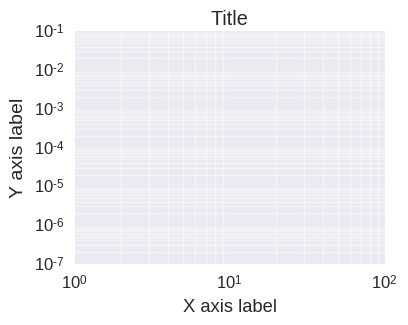

In [28]:
#create a figure with a size (measured in inches!)
plt.figure(figsize=(4,3)) 

#add a title to the figure
plt.title("Title")

#add a label in the x and y axis
plt.xlabel("X axis label")
plt.ylabel("Y axis label",fontsize=14) #we can add the font size to all the functions where we pass text

#add a legend (by default in seaborn)
plt.legend()

#use log scale in the x and y axis
plt.xscale("log")
plt.yscale("log")

#trim the x axis between 1 and 100 (to make it look like you want, it depends on your specific values)
plt.xlim((1,100))

#add minor ticks (vertical/horizontal lines) with tranparency 50%
plt.grid(which='minor',alpha=0.5)

#take out the grid
plt.grid(False)

#save the figure (I CAN'T STRESS ENOUGH: SAVE AS PDF FOR ANY PAPER YOU WRITE!)
plt.savefig("figures/name_of_figure.pdf") 

#show the figure (not required in jupyter notebooks but still good to write it)
plt.show()

#Change the size of all fonts
sns.set(font_scale=1.2) #20% larger fonts

#Take out the vertical or horizontal grid and adjust the axis of the figure (trim them)
sns.despine(trim=True)

#Important link with many options for the visualizations
#http://seaborn.pydata.org/tutorial/aesthetics.html

## 5.2 Scatter plot: plt.scatter(arguments)
Used to plot two quantitative variables against each other. We can add one extra quant. variable if we use bubble size and one qualitative if we use bubble color.

Important arguments:
- **x**: x values (an array)
- **y**: y values (an array)
- **c** (optional, default = "blue"): color (can be an array, or a string such as "blue")
- **s** (optional, default = 20): size (can be an array, or a number)
- **alpha** (optional, default = 1): transparency
- **edgecolor** (optional, default = "black"): "none" for none
- **cmap**: which colormap to use: http://matplotlib.org/examples/color/colormaps_reference.html
- **label**: label of the plot for the legend


In [30]:
df.head()

,person,year,treatment,score,happiness,events
0,1,2000,1,4.0,1,1
1,2,2000,1,3.0,2,2
2,3,2000,2,6.0,3,3
3,4,2000,2,4.0,4,4
4,1,2005,1,8.0,5,5


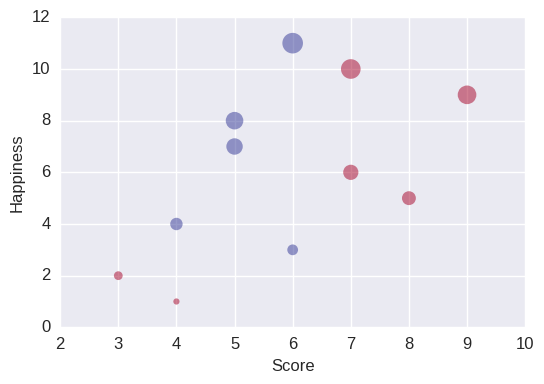

In [32]:
x = df["score"] #x values
y = df["happiness"] #y values
c = df["treatment"] #color
s = df["events"] #size

#Create a figure
plt.figure(figsize=(6,4)) 

#Make the scatter plot, using treatment as color, and events as size of the marker, 
#no edgecolor and a Red-Yellow-Blue colormap
plt.scatter(x,y,c=c,s=s*20,edgecolor="none",cmap="RdYlBu",alpha=0.5)
plt.xlabel("Score",fontsize=12)
plt.ylabel("Happiness",fontsize=12)
plt.show()

In [33]:
#A function to annotate a scatter plot
def annotate_scatter(x,y,label,data,fontsize=14):
    """
    Function to annotate a scatter plot
    
    Input:
    x: name of variable in x axis
    y: name of variable in y axis
    label: name of variable with the labels
    data: dataframe
    fontsize (default 14): font size
    
    """
       
    for label,x,y in zip(data[label],data[x],data[y]):
        plt.annotate(label,(x,y),fontsize=fontsize)

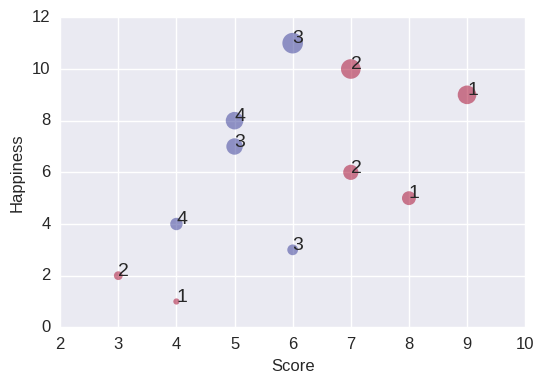

In [34]:
x = df["score"] #x values
y = df["happiness"] #y values
c = df["treatment"] #color
s = df["events"] #size

#Create a figure
plt.figure(figsize=(6,4)) 

#Make the scatter plot, using treatment as color, 80 as size of the marker, 
#no edgecolor and a Red-Yellow-Blue colormap
plt.scatter(x,y,c=c,s=s*20,edgecolor="none",cmap="RdYlBu",alpha=0.5)
annotate_scatter(x="score",y="happiness",label="person",data=df)
plt.xlabel("Score",fontsize=12)
plt.ylabel("Happiness",fontsize=12)
plt.show()

